**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.neighbors import KDTree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [16]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors=5, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self._fit_method = algorithm

    def fit(self, X, y):
        self.X = X
        if self._fit_method == 'kd_tree':
            self.tree = KDTree(X)
        self.y = y
        self.labels = np.unique(y)
        self.l_num = self.labels.shape[0]

    def _get_arr(self, X):
        if self._fit_method == 'kd_tree':
            _, ind = self.tree.query(X, k=self.n_neighbors)
            return self.y[ind]
        else:
            ind = np.argpartition(sc.spatial.distance.cdist(X, self.X),
                                  self.n_neighbors)
            return self.y[ind[:, :self.n_neighbors]]

    def predict(self, X):
        arr = self._get_arr(X)
        return np.array(sc.stats.mode(arr, axis=1))[0].reshape(len(X))

    def predict_proba(self, X):
        arr = self._get_arr(X).astype(int)
        return np.apply_along_axis(lambda x:
                                   np.bincount(x, minlength=self.l_num) /
                                   np.sum(np.bincount(x,
                                                      minlength=self.l_num)),
                                   1, arr)

    def score(self, X, y):
        pred = self.predict(X)
        return sum(pred == y) / len(y)

**IRIS**

In [18]:
iris = datasets.load_iris()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, stratify=iris.target)

In [20]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [21]:
%time clf.fit(X_train, y_train)

CPU times: user 545 µs, sys: 3.6 ms, total: 4.14 ms
Wall time: 39 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [22]:
%time my_clf.fit(X_train, y_train)

CPU times: user 214 µs, sys: 26 µs, total: 240 µs
Wall time: 139 µs


In [23]:
my_clf.predict(X_test)

array([2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 1, 0, 1, 2, 1])

In [24]:
%time clf.predict(X_test)

CPU times: user 4.24 ms, sys: 30 µs, total: 4.27 ms
Wall time: 3.56 ms


array([2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 1, 0, 1, 2, 1])

In [25]:
%time my_clf.predict(X_test)

CPU times: user 1.54 ms, sys: 189 µs, total: 1.73 ms
Wall time: 1.24 ms


array([2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       1, 2, 1, 0, 1, 2, 1])

In [26]:
%time clf.predict_proba(X_test)

CPU times: user 2.2 ms, sys: 269 µs, total: 2.47 ms
Wall time: 1.88 ms


array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.]])

In [27]:
%time my_clf.predict_proba(X_test)

CPU times: user 4.96 ms, sys: 3.26 ms, total: 8.22 ms
Wall time: 5.9 ms


array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.]])

In [28]:
clf.score(X_test, y_test)

0.96666666666666667

In [29]:
my_clf.score(X_test, y_test)

0.96666666666666667

Задание 3

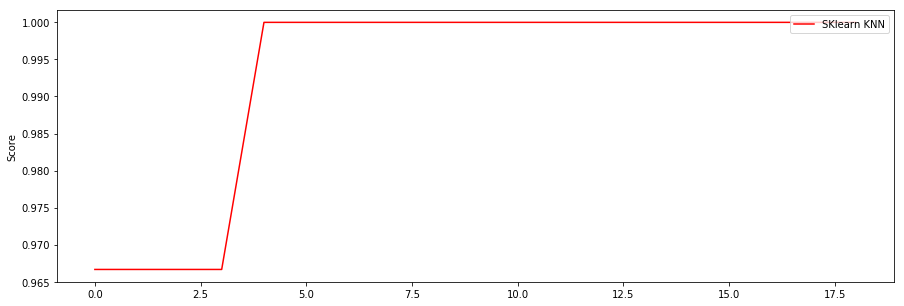

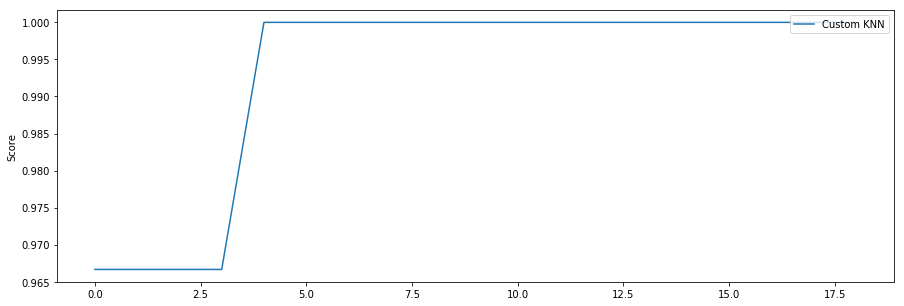

In [30]:
buf1 = []
buf2 = []
for k in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors=k)
    my_clf = MyKNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    my_clf.fit(X_train, y_train)
    buf1.append(clf.score(X_test, y_test))
    buf2.append(my_clf.score(X_test, y_test))

fig = plt.figure(figsize=(15, 5))
ax1 = plt.plot(buf1, 'r', label='SKlearn KNN')
plt.ylabel("Score")
plt.legend(loc='upper right')

fig = plt.figure(figsize=(15, 5))
ax2 = plt.plot(buf2, label='Custom KNN')
plt.ylabel("Score")
plt.legend(loc='upper right')
plt.show()

In [31]:
optim_param = np.argmax(buf1) + 1
optim_param

5

**MNIST**

In [32]:
mnist = fetch_mldata('MNIST original')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [34]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [35]:
%time clf.fit(X_train, y_train)

CPU times: user 42 s, sys: 215 ms, total: 42.2 s
Wall time: 42.4 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [36]:
%time my_clf.fit(X_train, y_train)

CPU times: user 3.67 ms, sys: 0 ns, total: 3.67 ms
Wall time: 2.77 ms


In [37]:
%time clf.predict(X_test)

CPU times: user 1min 31s, sys: 112 ms, total: 1min 31s
Wall time: 1min 32s


array([ 7.,  7.,  4.,  3.,  2.,  2.,  9.,  3.,  2.,  1.,  7.,  1.,  4.,
        2.,  5.,  5.,  9.,  8.,  1.,  1.,  7.,  3.,  9.,  2.,  0.,  9.,
        2.,  2.,  6.,  2.,  1.,  0.,  7.,  8.,  7.,  7.,  7.,  1.,  5.,
        1.,  9.,  3.,  1.,  5.,  7.,  9.,  5.,  4.,  2.,  7.,  7.,  6.,
        1.,  4.,  5.,  3.,  9.,  4.,  6.,  2.,  2.,  8.,  6.,  6.,  5.,
        8.,  0.,  4.,  5.,  5.,  7.,  7.,  0.,  8.,  9.,  7.,  3.,  7.,
        3.,  1.,  1.,  6.,  5.,  1.,  0.,  3.,  6.,  6.,  1.,  3.,  0.,
        0.,  2.,  4.,  7.,  6.,  1.,  0.,  3.,  1.,  1.,  7.,  9.,  3.,
        5.,  4.,  6.,  0.,  4.,  5.,  5.,  3.,  1.,  4.,  7.,  1.,  2.,
        4.,  7.,  4.,  1.,  0.,  4.,  6.,  8.,  7.,  5.,  2.,  6.,  7.,
        4.,  7.,  6.,  9.,  1.,  5.,  6.,  8.,  4.,  6.,  9.,  6.,  1.,
        7.,  8.,  6.,  8.,  2.,  3.,  0.,  6.,  7.,  6.,  8.,  8.,  1.,
        2.,  8.,  8.,  6.,  9.,  4.,  2.,  4.,  9.,  6.,  6.,  4.,  4.,
        0.,  8.,  6.,  3.,  2.,  9.,  5.,  1.,  8.,  0.,  8.,  8

In [38]:
%time my_clf.predict(X_test)

CPU times: user 32.6 s, sys: 585 ms, total: 33.2 s
Wall time: 33.5 s


array([ 7.,  7.,  4.,  3.,  2.,  2.,  9.,  3.,  2.,  1.,  7.,  1.,  4.,
        2.,  5.,  5.,  9.,  8.,  1.,  1.,  7.,  3.,  9.,  2.,  0.,  9.,
        2.,  2.,  6.,  2.,  1.,  0.,  7.,  8.,  7.,  7.,  7.,  1.,  5.,
        1.,  9.,  3.,  1.,  5.,  7.,  9.,  5.,  4.,  2.,  7.,  7.,  6.,
        1.,  4.,  5.,  3.,  9.,  4.,  6.,  2.,  2.,  8.,  6.,  6.,  5.,
        8.,  0.,  4.,  5.,  5.,  7.,  7.,  0.,  8.,  9.,  7.,  3.,  7.,
        3.,  1.,  1.,  6.,  5.,  1.,  0.,  3.,  6.,  6.,  1.,  3.,  0.,
        0.,  2.,  4.,  7.,  6.,  1.,  0.,  3.,  1.,  1.,  7.,  9.,  3.,
        5.,  4.,  6.,  0.,  4.,  5.,  5.,  3.,  1.,  4.,  7.,  1.,  2.,
        4.,  7.,  4.,  1.,  0.,  4.,  6.,  8.,  7.,  5.,  2.,  6.,  7.,
        4.,  7.,  6.,  9.,  1.,  5.,  6.,  8.,  4.,  6.,  9.,  6.,  1.,
        7.,  8.,  6.,  8.,  2.,  3.,  0.,  6.,  7.,  6.,  8.,  8.,  1.,
        2.,  8.,  8.,  6.,  9.,  4.,  2.,  4.,  9.,  6.,  6.,  4.,  4.,
        0.,  8.,  6.,  3.,  2.,  9.,  5.,  1.,  8.,  0.,  8.,  8

In [39]:
%time clf.predict_proba(X_test)

CPU times: user 1min 29s, sys: 67.6 ms, total: 1min 29s
Wall time: 1min 29s


array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [40]:
%time my_clf.predict_proba(X_test)

CPU times: user 31.3 s, sys: 480 ms, total: 31.8 s
Wall time: 31.8 s


array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [41]:
%time clf.score(X_test, y_test)

CPU times: user 1min 31s, sys: 75.3 ms, total: 1min 31s
Wall time: 1min 31s


0.97142857142857142

In [42]:
%time my_clf.score(X_test, y_test)

CPU times: user 32.5 s, sys: 816 ms, total: 33.4 s
Wall time: 33.8 s


0.97142857142857142

Задание 4

In [43]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [45]:
%time clf.fit(X_train, y_train)

CPU times: user 40.9 s, sys: 192 ms, total: 41.1 s
Wall time: 41.1 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [46]:
%time my_clf.fit(X_train, y_train)

CPU times: user 39.6 s, sys: 197 ms, total: 39.8 s
Wall time: 39.6 s


In [47]:
%time clf.predict(X_test)

CPU times: user 1min 32s, sys: 31.7 ms, total: 1min 32s
Wall time: 1min 32s


array([ 8.,  4.,  1.,  8.,  4.,  9.,  5.,  7.,  3.,  4.,  0.,  5.,  4.,
        6.,  9.,  2.,  9.,  2.,  9.,  8.,  3.,  3.,  1.,  6.,  7.,  3.,
        5.,  1.,  2.,  9.,  1.,  8.,  7.,  9.,  1.,  2.,  6.,  0.,  6.,
        2.,  3.,  6.,  3.,  4.,  8.,  4.,  9.,  1.,  6.,  2.,  4.,  7.,
        2.,  9.,  7.,  8.,  7.,  0.,  0.,  5.,  8.,  3.,  6.,  1.,  3.,
        6.,  9.,  0.,  9.,  7.,  4.,  9.,  5.,  0.,  8.,  4.,  3.,  7.,
        8.,  5.,  0.,  2.,  2.,  5.,  5.,  8.,  3.,  8.,  5.,  6.,  8.,
        4.,  7.,  3.,  5.,  1.,  4.,  3.,  2.,  4.,  4.,  7.,  7.,  9.,
        8.,  0.,  7.,  7.,  6.,  5.,  7.,  4.,  0.,  8.,  0.,  1.,  1.,
        8.,  3.,  1.,  9.,  4.,  8.,  9.,  1.,  2.,  6.,  5.,  2.,  0.,
        4.,  9.,  5.,  6.,  1.,  3.,  8.,  2.,  7.,  4.,  2.,  3.,  2.,
        7.,  3.,  5.,  0.,  3.,  4.,  9.,  4.,  6.,  5.,  3.,  6.,  0.,
        2.,  3.,  7.,  8.,  3.,  0.,  1.,  1.,  5.,  5.,  9.,  6.,  0.,
        4.,  6.,  6.,  0.,  5.,  9.,  0.,  3.,  6.,  0.,  0.,  5

In [48]:
%time my_clf.predict(X_test)

CPU times: user 1min 17s, sys: 124 ms, total: 1min 17s
Wall time: 1min 17s


array([ 8.,  4.,  1.,  8.,  4.,  9.,  5.,  7.,  3.,  4.,  0.,  5.,  4.,
        6.,  9.,  2.,  9.,  2.,  9.,  8.,  3.,  3.,  1.,  6.,  7.,  3.,
        5.,  1.,  2.,  9.,  1.,  8.,  7.,  9.,  1.,  2.,  6.,  0.,  6.,
        2.,  3.,  6.,  3.,  4.,  8.,  4.,  9.,  1.,  6.,  2.,  4.,  7.,
        2.,  9.,  7.,  8.,  7.,  0.,  0.,  5.,  8.,  3.,  6.,  1.,  3.,
        6.,  9.,  0.,  9.,  7.,  4.,  9.,  5.,  0.,  8.,  4.,  3.,  7.,
        8.,  5.,  0.,  2.,  2.,  5.,  5.,  8.,  3.,  8.,  5.,  6.,  8.,
        4.,  7.,  3.,  5.,  1.,  4.,  3.,  2.,  4.,  4.,  7.,  7.,  9.,
        8.,  0.,  7.,  7.,  6.,  5.,  7.,  4.,  0.,  8.,  0.,  1.,  1.,
        8.,  3.,  1.,  9.,  4.,  8.,  9.,  1.,  2.,  6.,  5.,  2.,  0.,
        4.,  9.,  5.,  6.,  1.,  3.,  8.,  2.,  7.,  4.,  2.,  3.,  2.,
        7.,  3.,  5.,  0.,  3.,  4.,  9.,  4.,  6.,  5.,  3.,  6.,  0.,
        2.,  3.,  7.,  8.,  3.,  0.,  1.,  1.,  5.,  5.,  9.,  6.,  0.,
        4.,  6.,  6.,  0.,  5.,  9.,  0.,  3.,  6.,  0.,  0.,  5

In [49]:
%time clf.predict_proba(X_test)

CPU times: user 1min 31s, sys: 23.9 ms, total: 1min 31s
Wall time: 1min 31s


array([[ 0. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.5,  0.5]])

In [50]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 16s, sys: 176 ms, total: 1min 17s
Wall time: 1min 17s


array([[ 0. ,  0. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 1. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0.5,  0.5]])

In [51]:
clf.score(X_test, y_test)

0.96571428571428575

In [52]:
my_clf.score(X_test, y_test)

0.96571428571428575

Задание 5

In [ ]:
# seaborn - библиотека для визуализации, основанная на matplotlib
# matplotlib - основная библиотека для визуализации
# train_test_split - метод для разделения выборки на обучающую и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - объект конвейера для последовательных преобразований с некоторой моделью в конце
# StandardScaler (from sklearn.preprocessing import StandardScaler) - функция для центрирования и нормирования выборки
# ClassifierMixin - базовый класс для всех классификаторов, реализует метод score(), возвращающий метрику accuracy
# NeighborsBase - метод _fit() вызывается после вызова метода fit() класса SupervisedIntegerMixin и реализует логику по сохранению выборки X 
# и устнановки параметров метрики.Метод _check_algorithm_metric используется для проверки параметров метрики
# KNeighborsMixin - реализует функции kneighbors и kneighbors_graph для нахождения k ближайших соседей и построения графа соседей соответственно
# SupervisedIntegerMixin - используется для проверки типа y при вызове fit()